# Track particles

In [1]:
# Libraries ----
import sys  # type: ignore
import imageio  # type: ignore
import warnings
import numpy as np  # type: ignore
import pandas as pd  # type: ignore

sys.path.append('../modules')
import track_particles as tp  # type: ignore
import plot_tracking as plt_tp  # type: ignore
import clustering_particles as cp  # type: ignore

# Global options ----
warnings.filterwarnings("ignore")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_columns', None)

## Global variables

In [2]:
input_path = "../input_files"
output_path = "../output_files"
log_path = "../logs"
input_generation_date = "2024-10-04"

n_particles = 4
video_name = "23_05_23_3_1080_proof"
x_bounds = [40, 1020]
y_bounds = [160, 1740]
x_zoom = [760, 1000]
y_zoom = [1500, 1720]

## Setting video information

In [3]:
# Load the video
reader = imageio.get_reader("{}/{}.mp4".format(input_path, video_name), "ffmpeg")

# Check the number of frames
num_frames = reader.count_frames()
print("Total frames: {}".format(num_frames))

# Extract a frame to inspect the content
time = 0
frame = reader.get_data(time)
print("Frames resolution: {} x {}".format(frame.shape[0], frame.shape[1]))

Total frames: 6783
Frames resolution: 1080 x 1920


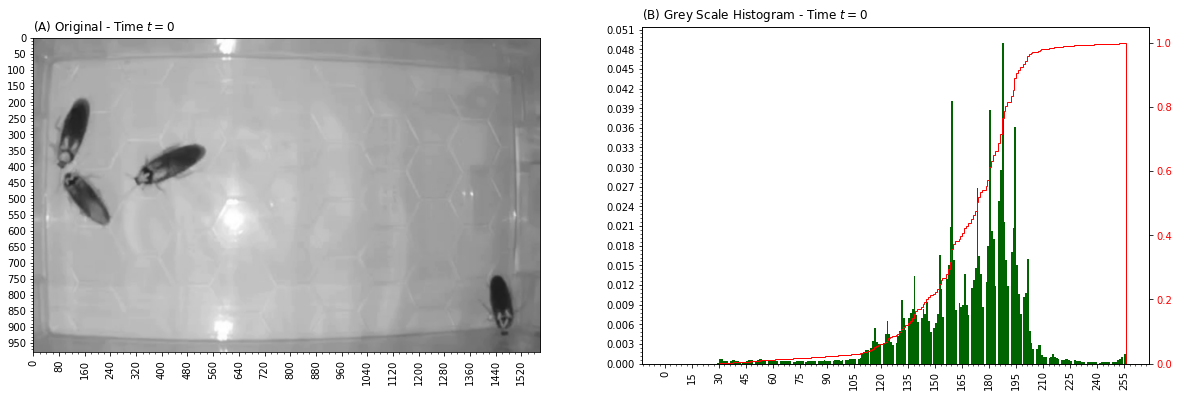

In [4]:
# Original Frame
time = 0
width = 10
width_ratio = 1
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # [40, 1020]
y_bounds = y_bounds  # [160, 1740]
x_zoom = None  # x_zoom  # [760, 1000]
y_zoom = None  # y_zoom  # [1500, 1720]

plt_tp.plot_normal_frame(
    reader=reader,
    time=time,
    width=width,
    width_ratio=width_ratio,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom
)

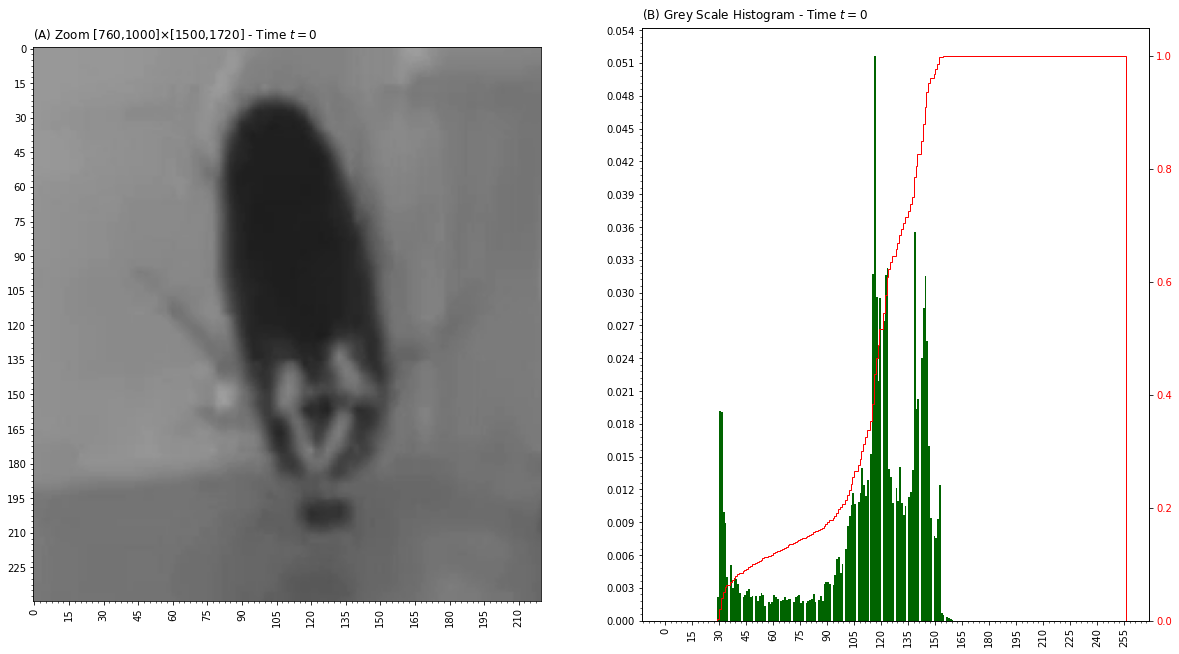

In [5]:
# Zooming particle
time = 0
width = 10
width_ratio = 1
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # [40, 1020]
y_bounds = y_bounds  # [160, 1740]
x_zoom = [760, 1000]
y_zoom = [1500, 1720]

plt_tp.plot_normal_frame(
    reader=reader,
    time=time,
    width=width,
    width_ratio=width_ratio,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom
)

## Profiling video information

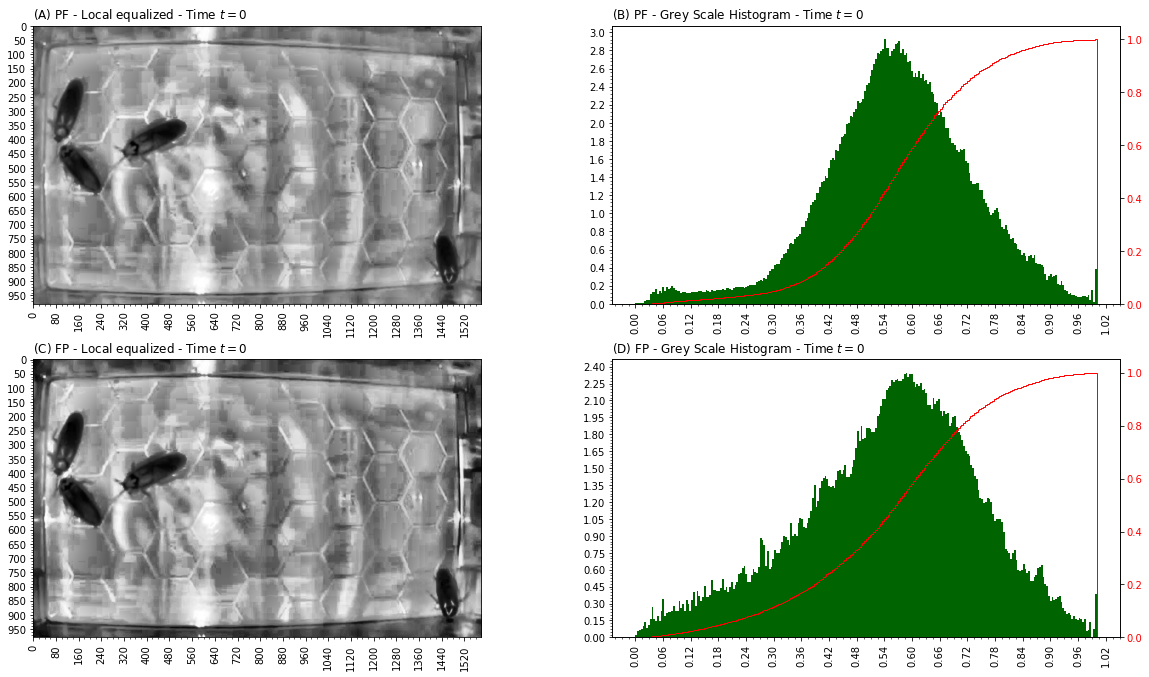

In [6]:
# Original Frame
time = 0
width = 10
width_ratio = 1
type = "local equalized"
clip_limit = 0.05
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # [40, 1020]
y_bounds = y_bounds  # [160, 1740]
x_zoom = None  # x_zoom  # [760, 1000]
y_zoom = None  # y_zoom  # [1500, 1720]

plt_tp.plot_profiled_frame(
    reader=reader,
    time=time,
    width=width,
    width_ratio=width_ratio,
    type=type,
    clip_limit=clip_limit,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom
)

## Boundaries and contours definition

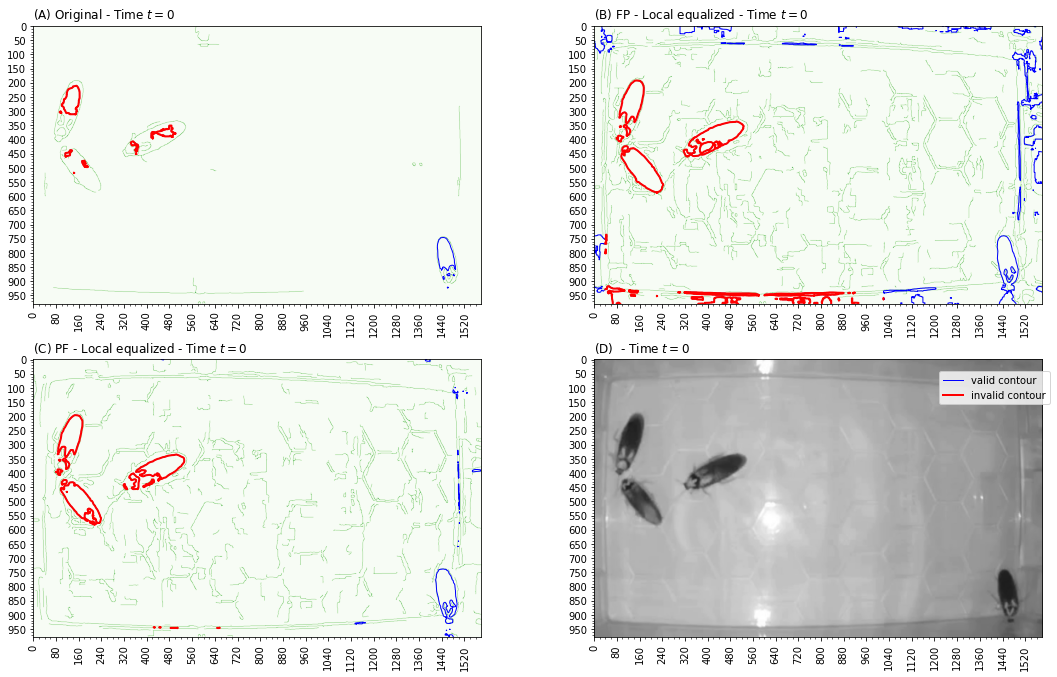

In [7]:
# Original frame
time = 0
width = 10
width_ratio = 1
type = "local equalized"
clip_limit = 0.05
threshold = 0.19
sigma = 2
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # [40, 1020]
y_bounds = y_bounds  # [160, 1740]
x_zoom = None  # x_zoom  # [760, 1000]
y_zoom = None  # y_zoom  # [1500, 1720]
fancy_legend = True
x_legend = 0.83
y_legend = 0.46

plt_tp.plot_boundary_edge_frame(
    reader=reader,
    time=time,
    width=width,
    width_ratio=width_ratio,
    type=type,
    clip_limit=clip_limit,
    threshold=threshold,
    sigma=sigma,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom,
    fancy_legend=fancy_legend,
    x_legend=x_legend,
    y_legend=y_legend
)

## Do tracking algorithm

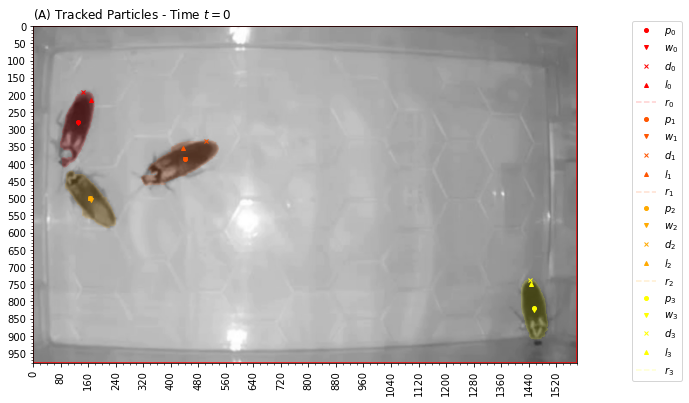

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,coords_x,coords_y,orientation,area,area_convex,area_filled,axis_major,axis_minor,eccentricity,euler_number
18,0,0,131.528,276.833,130.211,282.227,0.000,144.000,192.000,0.600,169.000,214.000,[144 145 146 ... 90 91 92],[192 192 192 ... 408 408 408],-0.283,9003.000,13063.000,9055.000,196.509,71.545,0.931,-37
25,1,0,441.575,385.495,440.578,386.433,0.000,503.000,333.000,0.678,435.000,353.000,[503 504 505 ... 326 327 328],[333 333 333 ... 461 461 461],-1.149,10334.000,16289.000,10347.000,223.342,77.106,0.939,-39
40,2,0,164.090,499.927,167.468,504.737,nan,164.090,499.927,nan,164.090,499.927,[112 113 114 ... 221 212 213],[422 422 422 ... 584 585 585],0.740,9824.000,12826.000,9890.000,187.737,75.125,0.916,-28
69,3,0,1455.117,818.787,1456.168,823.600,0.000,1445.000,738.000,0.459,1447.000,749.000,[1445 1437 1438 ... 1475 1453 1454],[738 739 739 ... 907 908 908],0.174,8660.000,9916.000,8901.000,173.372,69.565,0.916,-24


In [8]:
# Original frame
time = 0
reinforce_boundaries = True
remove_holes = False
type = "local equalized"
clip_limit = 0.05
threshold = 0.19
sigma = 1.0
x_bounds = x_bounds  # [40, 1020]
y_bounds = y_bounds  # [160, 1740]
region_area_min = 200
axis_major_min = 94
eccentricity_max = 0.99
width = 10
n_x_breaks = 20
n_y_breaks = 20
x_zoom = None  # x_zoom  # [760, 1000]
y_zoom = None  # y_zoom  # [1500, 1720]
fancy_legend = True
x_legend = 1.001
y_legend = 0.891

df_tracked_frame = tp.process_frame(
    reinforce_boundaries=reinforce_boundaries,
    remove_holes=remove_holes,
    type=type,
    clip_limit=clip_limit,
    threshold=threshold,
    sigma=sigma,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    region_area_min=region_area_min,
    axis_major_min=axis_major_min,
    eccentricity_max=eccentricity_max,
    tracking_list=[time, reader.get_data(time)]
)

plt_tp.plot_tracking_frame(
    reader=reader,
    time=time,
    df_tracked_frame=df_tracked_frame,
    width=width,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom,
    fancy_legend=fancy_legend,
    x_legend=x_legend,
    y_legend=y_legend
)

df_tracked_frame.style.format(precision=3)

In [9]:
# Original frame
times = np.arange(0, 6783, 10)
reinforce_boundaries = True
remove_holes = False
type = "local equalized"
clip_limit = 0.05
threshold = 0.19
sigma = 1.0
x_bounds = x_bounds  # [40, 1020]
y_bounds = y_bounds  # [160, 1740]
region_area_min = 200
axis_major_min = 94
eccentricity_max = 0.99
width = 10
n_x_breaks = 20
n_y_breaks = 20

df_tracked_frames = tp.process_multiple_frames(
    reader=reader,
    times=times,
    reinforce_boundaries=reinforce_boundaries,
    remove_holes=remove_holes,
    clip_limit=clip_limit,
    type=type,
    threshold=threshold,
    sigma=sigma,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    region_area_min=region_area_min,
    axis_major_min=axis_major_min,
    eccentricity_max=eccentricity_max
)

df_tracked_frames.head(6)

100%|█████████████████████| 679/679 [00:37<00:00, 18.19it/s]


,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,coords_x,coords_y,orientation,area,area_convex,area_filled,axis_major,axis_minor,eccentricity,euler_number,id_count
0,0,0,131.528046,276.833278,130.210547,282.226882,0.0,144.000000,192.000000,0.600000,169.000000,214.000000,"[144, 145, 146, 147, 148, 149, 150, 151, 140, ...","[192, 192, 192, 192, 192, 192, 192, 192, 193, ...",-0.283272,9003.0,13063.0,9055.0,196.508733,71.545368,0.931367,-37,4
1,1,0,441.574705,385.494678,440.578473,386.432646,0.0,503.000000,333.000000,0.678431,435.000000,353.000000,"[503, 504, 505, 506, 507, 501, 502, 504, 508, ...","[333, 333, 333, 333, 333, 334, 334, 334, 334, ...",-1.149226,10334.0,16289.0,10347.0,223.342320,77.106254,0.938515,-39,4
2,2,0,164.089882,499.926507,167.467916,504.737312,NaN,164.089882,499.926507,NaN,164.089882,499.926507,"[112, 113, 114, 106, 107, 108, 109, 110, 111, ...","[422, 422, 422, 423, 423, 423, 423, 423, 423, ...",0.740281,9824.0,12826.0,9890.0,187.736663,75.124902,0.916445,-28,4
3,3,0,1455.116975,818.787067,1456.167650,823.599690,0.0,1445.000000,738.000000,0.458824,1447.000000,749.000000,"[1445, 1437, 1438, 1441, 1442, 1443, 1444, 144...","[738, 739, 739, 739, 739, 739, 739, 739, 739, ...",0.174242,8660.0,9916.0,8901.0,173.371618,69.565062,0.915969,-24,4
4,0,10,130.818581,278.855370,128.819491,285.730096,0.0,163.000000,194.000000,0.592157,143.000000,215.000000,"[163, 164, 164, 164, 165, 140, 141, 146, 147, ...","[194, 194, 195, 196, 196, 197, 197, 197, 197, ...",-0.302853,9106.0,13088.0,9109.0,195.403803,71.830905,0.929983,-29,5
5,1,10,428.449658,378.253099,427.376469,378.512106,0.0,476.000000,337.000000,0.549020,483.000000,348.000000,"[476, 477, 478, 479, 480, 481, 466, 467, 468, ...","[337, 337, 337, 337, 337, 337, 338, 338, 338, ...",-1.310884,7906.0,9962.0,7910.0,172.647558,62.002972,0.933287,-26,5


## Update incorrect tracked frames

In [10]:
times_new = df_tracked_frames[df_tracked_frames["id_count"] < n_particles]["time"].unique()
remove_holes_new = True
threshold_new = 0.06
sigma_new = 0.8
print("Incorrect tracking particles at {} times: {}".format(len(times_new), times_new))

df_tracked_frames_new = tp.process_multiple_frames(
    reader=reader,
    times=times_new,
    reinforce_boundaries=reinforce_boundaries,
    remove_holes=remove_holes_new,
    clip_limit=clip_limit,
    type=type,
    threshold=threshold_new,
    sigma=sigma,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    region_area_min=region_area_min,
    axis_major_min=axis_major_min,
    eccentricity_max=eccentricity_max
)
times_new_2 = df_tracked_frames_new[df_tracked_frames_new["id_count"] < n_particles]["time"].unique()
print("Apply again tracking algorithm with stronger threshold and removing holes")
print("Persistent particles untracked at {} times: {}".format(len(times_new_2), times_new_2))

Incorrect tracking particles at 87 times: [ 350  720  770  780  910  920 1440 1450 1460 1590 1600 1640 1660 1710
 1730 1740 1750 1760 1770 1780 1790 1800 1810 1820 1830 1980 1990 2010
 2020 2030 2040 2050 2060 2070 2080 2090 2100 2110 2120 2130 2170 2190
 3050 3090 3100 3110 3120 3130 3140 3150 3160 3170 3180 3190 3200 3230
 3240 3250 3260 3270 3280 3290 3820 3840 3900 3910 3920 3940 3950 3960
 3970 4010 4950 5030 6390 6400 6540 6560 6570 6590 6600 6610 6660 6670
 6680 6690 6780]


100%|███████████████████████| 87/87 [00:06<00:00, 14.00it/s]


Apply again tracking algorithm with stronger threshold and removing holes
Persistent particles untracked at 51 times: [ 350  770  780 1450 1460 1590 1600 1660 1710 1730 1740 1760 1770 1780
 1790 1800 1820 1830 2010 2020 2030 2050 2060 2080 2090 2100 2110 2120
 2130 3110 3120 3130 3170 3230 3280 3820 3900 3910 3920 3950 3960 3970
 5030 6390 6400 6560 6590 6600 6610 6660 6780]


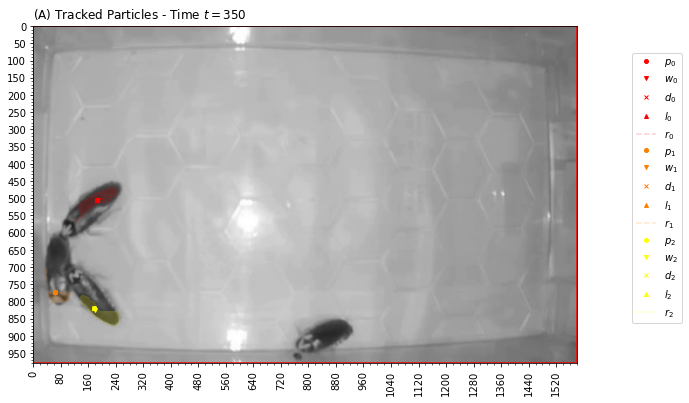

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,coords_x,coords_y,orientation,area,area_convex,area_filled,axis_major,axis_minor,eccentricity,euler_number
17,0,350,185.916129,504.517595,187.070973,504.188842,NaN,185.916129,504.517595,NaN,185.916129,504.517595,"[231, 230, 231, 232, 227, 228, 229, 230, 231, ...","[469, 470, 470, 470, 471, 471, 471, 471, 471, ...",-1.064604,3410.0,5012.0,3413.0,137.908943,35.405809,0.966482,-7
77,1,350,62.714932,772.601810,63.955443,775.005986,NaN,62.714932,772.601810,NaN,62.714932,772.601810,"[39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 39, 3...","[702, 703, 704, 705, 706, 707, 708, 709, 710, ...",0.658514,221.0,4236.0,221.0,131.598836,65.607427,0.866866,1
112,2,350,176.881688,819.972057,180.543851,823.314102,NaN,176.881688,819.972057,NaN,176.881688,819.972057,"[141, 145, 146, 147, 141, 142, 145, 146, 147, ...","[784, 784, 784, 784, 785, 785, 785, 785, 785, ...",0.842327,1682.0,4705.0,1688.0,121.225610,30.440149,0.967960,0


In [11]:
# Original frame
time = times_new_2[0]
reinforce_boundaries = True
type = "local equalized"
clip_limit = 0.05
x_bounds = x_bounds  # [240, 900]
y_bounds = y_bounds  # [300, 1460]
region_area_min = 200
axis_major_min = 94
eccentricity_max = 0.99
width = 10
n_x_breaks = 20
n_y_breaks = 20
x_zoom = None  # x_zoom  # [760, 880]
y_zoom = None  # y_zoom  # [320, 520]
fancy_legend = True
x_legend = 1.001
y_legend = 0.821

df_tracked_frame = tp.process_frame(
    reinforce_boundaries=reinforce_boundaries,
    remove_holes=remove_holes_new,
    type=type,
    clip_limit=clip_limit,
    threshold=threshold_new,
    sigma=sigma_new,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    region_area_min=region_area_min,
    axis_major_min=axis_major_min,
    eccentricity_max=eccentricity_max,
    tracking_list=[time, reader.get_data(time)]
)

plt_tp.plot_tracking_frame(
    reader=reader,
    time=time,
    df_tracked_frame=df_tracked_frame,
    width=width,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom,
    fancy_legend=fancy_legend,
    x_legend=x_legend,
    y_legend=y_legend
)

df_tracked_frame


In [12]:
df_tracked_frames_final = pd.concat([df_tracked_frames, df_tracked_frames_new], ignore_index=True)
df_tracked_frames_final = (df_tracked_frames_final[
    df_tracked_frames_final["id_count"] == df_tracked_frames_final.groupby(["time", "id"])["id_count"].transform("max")
])
df_tracked_frames_final = df_tracked_frames_final.drop_duplicates(subset=["id", "time"], keep="first").sort_values(["time", "id"])

cols = ["id", "time", "id_count", "position_x", "position_y"]
print("First iteration: Tracking with threshold {}".format(threshold))
print(df_tracked_frames[df_tracked_frames["time"] == times_new_2[0]][cols])
print("\nSecond iteration: Tracking with threshold {}".format(threshold_new))
print(df_tracked_frames_new[df_tracked_frames_new["time"] == times_new_2[0]][cols])
print("\nFinal tracked data")
print(df_tracked_frames_final[df_tracked_frames_final["time"] == times_new_2[0]][cols])

First iteration: Tracking with threshold 0.19
     id  time  id_count  position_x  position_y
154   0   350         2  146.726352  655.657128
155   1   350         2  843.116578  905.230791

Second iteration: Tracking with threshold 0.06
   id  time  id_count  position_x  position_y
0   0   350         2  185.907652  504.527411
1   1   350         2  175.462920  818.936269

Final tracked data
     id  time  id_count  position_x  position_y
154   0   350         2  146.726352  655.657128
155   1   350         2  843.116578  905.230791


## Update contours of different IDs (Number of IDs is equal to the number of particles)

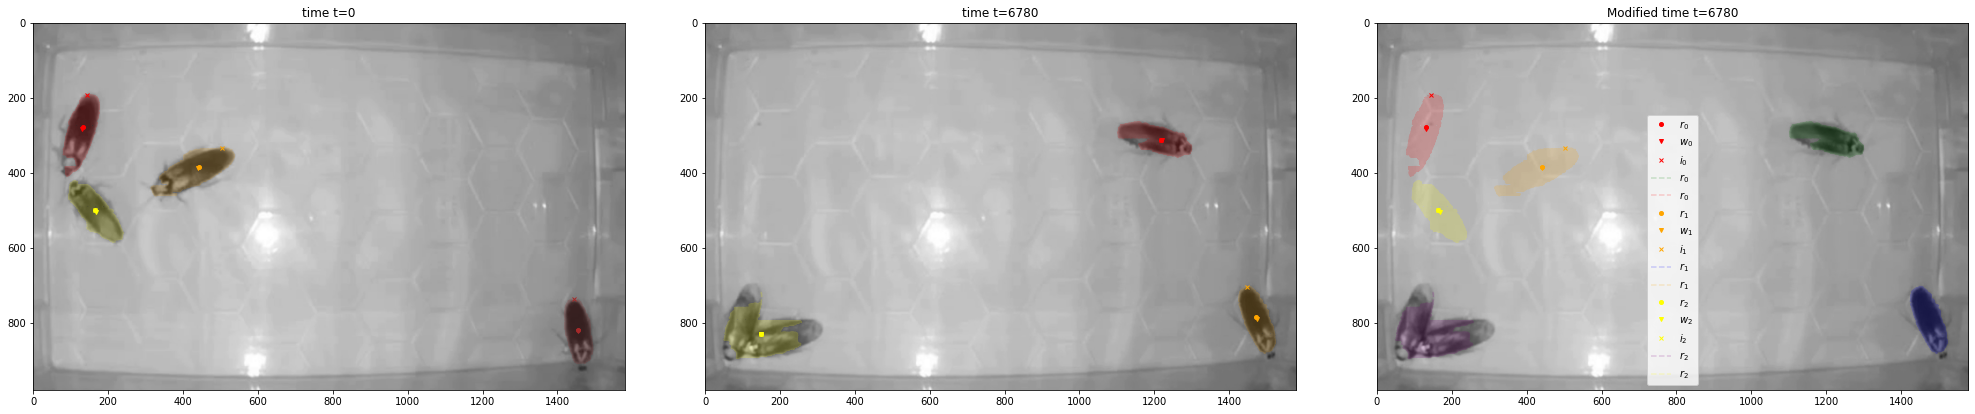

,id,time,position_x,position_y,weighted_x,weighted_y,darkest_v,darkest_x,darkest_y,lightest_v,lightest_x,lightest_y,coords_x,coords_y,orientation,area,area_convex,area_filled,axis_major,axis_minor,eccentricity,euler_number,id_count,ssim
0,0,6780,131.528046,276.833278,130.210547,282.226882,NaN,144.000000,192.000000,NaN,169.000000,214.000000,"[144, 145, 146, 147, 148, 149, 150, 151, 140, ...","[192, 192, 192, 192, 192, 192, 192, 192, 193, ...",1.217009,8815.0,12084.0,8837.0,186.844539,68.714121,0.929920,-10,3,1.0
1,1,6780,441.574705,385.494678,440.578473,386.432646,0.0,503.000000,333.000000,0.462745,435.000000,353.000000,"[503, 504, 505, 506, 507, 501, 502, 504, 508, ...","[333, 333, 333, 333, 333, 334, 334, 334, 334, ...",0.378760,9308.0,10684.0,9556.0,182.103373,70.146879,0.922832,-25,3,1.0
2,2,6780,164.089882,499.926507,167.467916,504.737312,NaN,164.089882,499.926507,NaN,164.089882,499.926507,"[112, 113, 114, 106, 107, 108, 109, 110, 111, ...","[422, 422, 422, 423, 423, 423, 423, 423, 423, ...",1.284302,9257.0,26401.0,9281.0,211.338437,133.257669,0.776155,-57,3,1.0


In [13]:
import matplotlib.pyplot as plt

time_1, time_2 = 0, times[-1]
A = df_tracked_frames_final[df_tracked_frames_final["time"].isin([time_1, time_2])]
B = cp.update_contours(
    reader=reader,
    df_tracked_1=A[A["time"] == time_1],
    df_tracked_2=A[A["time"] == time_2],
    type=type,
    clip_limit=clip_limit,
    distance_threshold=70,
    similarity_threshold=0.999
)

# Visualize the images for verification
fig_, ax_ = plt.subplots(1, 3)
fig_.set_size_inches(w=3 * 12, h=(reader.get_data(time_1).shape[0] * 12 / reader.get_data(time_1).shape[1]))
frame_1 = reader.get_data(time_1)[x_bounds[0]: x_bounds[1], y_bounds[0]: y_bounds[1]]
frame_2 = reader.get_data(time_2)[x_bounds[0]: x_bounds[1], y_bounds[0]: y_bounds[1]]
ax_[0].imshow(frame_1, cmap='gray')
ax_[1].imshow(frame_2, cmap='gray')
ax_[2].imshow(frame_2, cmap='gray')
ax_[0].set_title(r"time t={}".format(time_1))
ax_[1].set_title(r"time t={}".format(time_2))
ax_[2].set_title(r"Modified time t={}".format(time_2))

colors = ["red", "orange", "yellow", "brown"]
for id_ in A[A["time"] == time_1]["id"].unique():
    df_aux = A[((A["time"] == time_1) & (A["id"] == id_))]
    ax_[0].plot(df_aux["position_x"], df_aux["position_y"], marker="o", c=colors[id_], ms=4, ls="", label=r"$r_{{{}}}$".format(id_))
    ax_[0].plot(df_aux["weighted_x"], df_aux["weighted_y"], marker="v", c=colors[id_], ms=4, ls="", label=r"$w_{{{}}}$".format(id_))
    ax_[0].plot(df_aux["darkest_x"], df_aux["darkest_y"], marker="x", c=colors[id_], ms=4, ls="", label=r"$i_{{{}}}$".format(id_))
    ax_[0].plot(
        df_aux["coords_x"].values[0],
        df_aux["coords_y"].values[0],
        c=colors[id_],
        alpha=0.18,
        marker="",
        ls="--",
        label=r"$r_{{{}}}$".format(id_)
    )  # Boundaries

colors = ["red", "orange", "yellow", "brown"]
for id_ in A[A["time"] == time_2]["id"].unique():
    df_aux = A[((A["time"] == time_2) & (A["id"] == id_))]
    ax_[1].plot(df_aux["position_x"], df_aux["position_y"], marker="o", c=colors[id_], ms=4, ls="", label=r"$r_{{{}}}$".format(id_))
    ax_[1].plot(df_aux["weighted_x"], df_aux["weighted_y"], marker="v", c=colors[id_], ms=4, ls="", label=r"$w_{{{}}}$".format(id_))
    ax_[1].plot(df_aux["darkest_x"], df_aux["darkest_y"], marker="x", c=colors[id_], ms=4, ls="", label=r"$i_{{{}}}$".format(id_))
    ax_[1].plot(
        df_aux["coords_x"].values[0],
        df_aux["coords_y"].values[0],
        c=colors[id_],
        alpha=0.18,
        marker="",
        ls="--",
        label=r"$r_{{{}}}$".format(id_)
    )  # Boundaries

colors_ = ["green", "blue", "purple", "pink"]
for id_ in B["id"].unique():
    df_aux = B[B["id"] == id_]
    ax_[2].plot(df_aux["position_x"], df_aux["position_y"], marker="o", c=colors[id_], ms=4, ls="", label=r"$r_{{{}}}$".format(id_))
    ax_[2].plot(df_aux["weighted_x"], df_aux["weighted_y"], marker="v", c=colors[id_], ms=4, ls="", label=r"$w_{{{}}}$".format(id_))
    ax_[2].plot(df_aux["darkest_x"], df_aux["darkest_y"], marker="x", c=colors[id_], ms=4, ls="", label=r"$i_{{{}}}$".format(id_))
    ax_[2].plot(
        A[((A["time"] == time_2) & (A["id"] == id_))]["coords_x"].values[0],
        A[((A["time"] == time_2) & (A["id"] == id_))]["coords_y"].values[0],
        c=colors_[id_],
        alpha=0.18,
        marker="",
        ls="--",
        label=r"$r_{{{}}}$".format(id_)
    )  # Boundaries
    ax_[2].plot(
        df_aux["coords_x"].values[0],
        df_aux["coords_y"].values[0],
        c=colors[id_],
        alpha=0.18,
        marker="",
        ls="--",
        label=r"$r_{{{}}}$".format(id_)
    )  # Boundaries

plt.legend()
plt.subplots_adjust(wspace=0.01)
plt.show()
B


## Clustering IDs (Example)

Old data frame
    id  time  id_count   position_x  position_y  orientation
40   0    90         4   348.057723  418.635650    -0.899251
41   1    90         4    88.871982  446.378018    -0.134374
42   2    90         4   206.373141  580.874345     1.492318
43   3    90         4  1262.200080  859.869040    -1.211384
Actual data frame
    id  time  id_count   position_x  position_y  orientation
44   0   100         5    85.843700  438.848669    -0.378168
45   1   100         5   354.389593  412.711204    -1.041869
46   2   100         5    81.904376  543.158833    -0.517039
47   3   100         5   167.131150  608.749585    -1.503574
48   4   100         5  1254.463412  863.795550    -1.308985
New data
    id  time  id_count   position_x  position_y  orientation
44   1   100         5    85.843700  438.848669    -0.378168
45   0   100         5   354.389593  412.711204    -1.041869
47   2   100         5   167.131150  608.749585    -1.503574
48   3   100         5  1254.463412  863.79

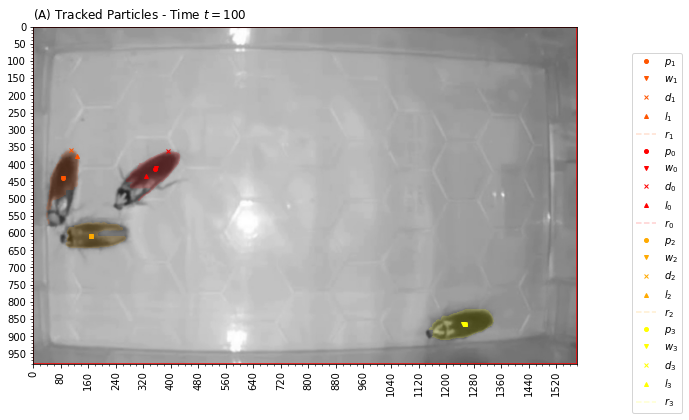

In [14]:
times_1, times_2, times_3 = 90, 100, 110
A = df_tracked_frames_final[df_tracked_frames_final["time"].isin([times_1, times_2, times_3])]
B = cp.clustering_consecutive_frames(
    df_tracked_old_frame=A[A["time"] == times_1],
    df_tracked_frame=A[A["time"] == times_2],
    weight_previous_time=0.5,
    distance_threshold=40,
    n_particles=n_particles
)

C = cp.clustering_consecutive_frames(
    df_tracked_old_frame=B,
    df_tracked_frame=A[A["time"] == times_3],
    weight_previous_time=0.5,
    distance_threshold=40,
    n_particles=n_particles
)

# B = cp.update_contours(
#     reader=reader,
#     df_tracked_1=A,
#     df_tracked_2=B,
#     type=type,
#     clip_limit=clip_limit,
#     distance_threshold=70,
#     similarity_threshold=0.999
# )

cols = ["id", "time", "id_count", "position_x", "position_y", "orientation"]
print("Old data frame")
print(A[A["time"] == times_1][cols])
print("Actual data frame")
print(A[A["time"] == times_2][cols])
print("New data")
print(B[cols])

plt_tp.plot_tracking_frame(
    reader=reader,
    time=times_2,
    df_tracked_frame=B,
    width=width,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom,
    fancy_legend=fancy_legend,
    x_legend=x_legend,
    y_legend=y_legend
)

## Clustering IDs (Number of IDs greater than number of particles)

In [15]:
# Manual Setup for time = 0
# tracking_0 = df_tracked_frames_final[df_tracked_frames_final["time"] == 0]

# if tracking_0.shape[0] != n_particles:
#     tracking_0 = tracking_0.drop_duplicates(subset=["id"], keep="first")
#     tracking_for_clustering = pd.concat([
#         tracking_0,
#         df_tracked_frames_final[df_tracked_frames_final["time"] != 0]
#     ])

In [16]:
type = "local equalized"
clip_limit = 0.05
distance_threshold = 300
compare_bounds = False
similarity_threshold = 0.85

df_all_clustered = cp.clustering_all_frames(
    reader=reader,
    df_all_tracked=df_tracked_frames_final,
    weights_previous_time=[0],
    type=type,
    clip_limit=clip_limit,
    distance_threshold=distance_threshold,
    similarity_threshold=similarity_threshold,
    compare_bounds=compare_bounds,
    n_particles=n_particles
)

- Init time: 0
- Init time: 10
- Clustered for time: 10
- Init time: 20
- Clustered for time: 20
- Init time: 30
- Clustered for time: 30
- Init time: 40
- Clustered for time: 40
- Init time: 50
- Clustered for time: 50
- Init time: 60
- Clustered for time: 60
- Init time: 70
- Clustered for time: 70
- Init time: 80
- Clustered for time: 80
- Init time: 90
- Clustered for time: 90
- Init time: 100
- Clustered for time: 100
- Init time: 110
- Clustered for time: 110
- Init time: 120
- Clustered for time: 120
- Init time: 130
- Clustered for time: 130
- Init time: 140
- Clustered for time: 140
- Init time: 150
- Clustered for time: 150
- Init time: 160
- Clustered for time: 160
- Init time: 170
- Clustered for time: 170
- Init time: 180
- Clustered for time: 180
- Init time: 190
- Clustered for time: 190
- Init time: 200
- Clustered for time: 200
- Init time: 210
- Clustered for time: 210
- Init time: 220
- Clustered for time: 220
- Init time: 230
- Clustered for time: 230
- Init time: 2

## Visualize final data

In [17]:
df_all_clustered.to_csv("{}/{}.csv".format(output_path, video_name), index=False)

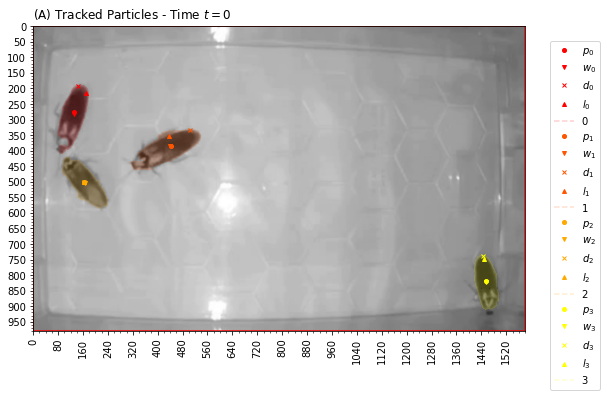

In [18]:
# Original frame
width = 10
n_x_breaks = 20
n_y_breaks = 20
x_bounds = x_bounds  # [40, 1020]
y_bounds = y_bounds  # [160, 1740]
x_zoom = None  # x_zoom  # [760, 1000]
y_zoom = None  # y_zoom  # [1500, 1720]
fancy_legend = True
x_legend = 1.050
y_legend = 0.951
interval = 500
fps = 2
output_name = video_name

plt_tp.plot_tracking_animation(
    reader=reader,
    df_tracked_frames=df_all_clustered[df_all_clustered["time"] <= 1000],
    width=width,
    n_x_breaks=n_x_breaks,
    n_y_breaks=n_y_breaks,
    x_bounds=x_bounds,
    y_bounds=y_bounds,
    x_zoom=x_zoom,
    y_zoom=y_zoom,
    fancy_legend=fancy_legend,
    x_legend=x_legend,
    y_legend=y_legend,
    interval=interval,
    fps=fps,
    output_path=output_path,
    output_name=output_name
)

In [19]:
# Ellipses problem: Where is the head? Solve with change of orientation and includes lightest pixel
# Interpolate for problematic values (delete IDs that incorrectly mix particles)

In [20]:
df_all_clustered["id_count"].value_counts(dropna=False, sort=False)

id_count
4     890
5    1321
6     483
3      22
Name: count, dtype: int64